# Data Processing 2

## Reshaping DataFrame
- Understand and be able to apply the `melt`/`stack`/`unstack`/`pivot` methods  

### df.Melt

The `melt` method transforms data from wide to long in form.

Here’s a visualization of that operation.

![melt.gif](melt.gif)  

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# made up
# columns A and B are "identifiers" while C, D, and E are variables.
df = pd.DataFrame({
    "A": [0, 0, 1, 1],
    "B": "x y x z".split(),
    "C": [1, 2, 1, 4],
    "D": [10, 20, 30, 20,],
    "E": [2, 1, 5, 4,]
})

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
A    4 non-null int64
B    4 non-null object
C    4 non-null int64
D    4 non-null int64
E    4 non-null int64
dtypes: int64(4), object(1)
memory usage: 240.0+ bytes


,A,B,C,D,E
0,0,x,1,10,2
1,0,y,2,20,1
2,1,x,1,30,5
3,1,z,4,20,4


In [7]:
df_melted = df.melt(id_vars=["A", "B"])
df_melted

,A,B,variable,value
0,0,x,C,1
1,0,y,C,2
2,1,x,C,1
3,1,z,C,4
4,0,x,D,10
5,0,y,D,20
6,1,x,D,30
7,1,z,D,20
8,0,x,E,2
9,0,y,E,1


In [8]:
# Don't worry about what this command does -- We'll see it soon
bball      = pd.read_csv('bball.csv')
bball_long = bball.melt(id_vars=["Year", "Player", "Team", "TeamName"])

Notice that the columns we specified as `id_vars` remained columns, but all
other columns were put into two new columns:

1. `variable`: This has dtype string and contains the former column names.
  as values  
1. `value`: This has the former values.  


### set_index, reset_index, and Transpose

We have already seen a few basic methods for reshaping a
DataFrame.

- `set_index`: Move one or more columns into the index.  
- `reset_index`: Move one or more index levels out of the index and make
  them either columns or drop from DataFrame.  
- `T`: Swap row and column labels.  


Sometimes, the simplest approach is the right approach.

Let’s review them briefly.

In [9]:
bball2 = bball.set_index(["Player", "Year"])
bball2.head()

Unnamed: 0 Team  TeamName  Games   Pts  Assist  Rebound
Player Year                                                         
Curry  2015           0  GSW  Warriors     79  30.1     6.7      5.4
       2016           1  GSW  Warriors     79  25.3     6.6      4.5
       2017           2  GSW  Warriors     51  26.4     6.1      5.1
Durant 2015           3  OKC   Thunder     72  28.2     5.0      8.2
       2016           4  GSW  Warriors     62  25.1     4.8      8.3

In [10]:
bball3 = bball2.T
bball3.head()

Player         Curry                       Durant                      \
Year            2015      2016      2017     2015      2016      2017   
Unnamed: 0         0         1         2        3         4         5   
Team             GSW       GSW       GSW      OKC       GSW       GSW   
TeamName    Warriors  Warriors  Warriors  Thunder  Warriors  Warriors   
Games             79        79        51       72        62        68   
Pts             30.1      25.3      26.4     28.2      25.1      26.4   

Player        Ibaka                  
Year           2015   2016     2016  
Unnamed: 0        6      7        8  
Team            OKC    ORL      TOR  
TeamName    Thunder  Magic  Raptors  
Games            78     56       23  
Pts            12.6   15.1     14.2

### stack and unstack
#### stack
`stack` is used to move certain levels of the column labels into the
index (i.e. moving from wide to long)

Below is an animation that shows how stacking works.
![stack.gif](stack.gif)  

In [11]:
df2 = df.set_index(["A", "B"])
df2_stack = df2.stack()
df2_stack

A  B   
0  x  C     1
      D    10
      E     2
   y  C     2
      D    20
      E     1
1  x  C     1
      D    30
      E     5
   z  C     4
      D    20
      E     4
dtype: int64

Suppose that we want to be able to use the `mean` method to compute the
average value of each stat for each player, regardless of year or team.

To do that, we need two column levels: one for the player and one for the variable.

We can achieve this using the `stack` method.

In [12]:
# Again, don't worry about this command... We'll see it soon too
bball_wide = bball_long.pivot_table(
    index="Year",
    columns=["Player", "variable", "Team"],
    values="value"
)
bball_wide

Player    Curry                                Durant                         \
variable Assist Games   Pts Rebound Unnamed: 0 Assist      Games         Pts   
Team        GSW   GSW   GSW     GSW        GSW    GSW  OKC   GSW   OKC   GSW   
Year                                                                           
2015        6.7  79.0  30.1     5.4        0.0    NaN  5.0   NaN  72.0   NaN   
2016        6.6  79.0  25.3     4.5        1.0    4.8  NaN  62.0   NaN  25.1   
2017        6.1  51.0  26.4     5.1        2.0    5.4  NaN  68.0   NaN  26.4   

Player    ... Ibaka                                                           
variable  ... Games   Pts             Rebound           Unnamed: 0            
Team      ...   TOR   OKC   ORL   TOR     OKC  ORL  TOR        OKC  ORL  TOR  
Year      ...                                                                 
2015      ...   NaN  12.6   NaN   NaN     6.8  NaN  NaN        6.0  NaN  NaN  
2016      ...  23.0   NaN  15.1  14.2     NaN  6.8  6.8        NaN  7.0  8.0  
2017      ...   NaN   NaN   NaN   NaN     NaN  NaN  NaN        NaN  NaN  NaN  

[3 rows x 30 columns]

In [13]:
bball_wide.stack()

Player     Curry                                Durant                      \
variable  Assist Games   Pts Rebound Unnamed: 0 Assist Games   Pts Rebound   
Year Team                                                                    
2015 GSW     6.7  79.0  30.1     5.4        0.0    NaN   NaN   NaN     NaN   
     OKC     NaN   NaN   NaN     NaN        NaN    5.0  72.0  28.2     8.2   
2016 GSW     6.6  79.0  25.3     4.5        1.0    4.8  62.0  25.1     8.3   
     ORL     NaN   NaN   NaN     NaN        NaN    NaN   NaN   NaN     NaN   
     TOR     NaN   NaN   NaN     NaN        NaN    NaN   NaN   NaN     NaN   
2017 GSW     6.1  51.0  26.4     5.1        2.0    5.4  68.0  26.4     6.8   

Player                Ibaka                                 
variable  Unnamed: 0 Assist Games   Pts Rebound Unnamed: 0  
Year Team                                                   
2015 GSW         NaN    NaN   NaN   NaN     NaN        NaN  
     OKC         3.0    0.8  78.0  12.6     6.8        6.0  
2016 GSW         4.0    NaN   NaN   NaN     NaN        NaN  
     ORL         NaN    1.1  56.0  15.1     6.8        7.0  
     TOR         NaN    0.7  23.0  14.2     6.8        8.0  
2017 GSW         5.0    NaN   NaN   NaN     NaN        NaN

In [14]:
player_stats = bball_wide.stack().mean()
player_stats

Player  variable  
Curry   Assist         6.466667
        Games         69.666667
        Pts           27.266667
        Rebound        5.000000
        Unnamed: 0     1.000000
Durant  Assist         5.066667
        Games         67.333333
        Pts           26.566667
        Rebound        7.766667
        Unnamed: 0     4.000000
Ibaka   Assist         0.866667
        Games         52.333333
        Pts           13.966667
        Rebound        6.800000
        Unnamed: 0     7.000000
dtype: float64

Now suppose instead of that we wanted to compute the average for each team and
stat, averaging over years and players.

We’d need to move the `Player` level down into the index so we are
left with column levels for Team and variable.

We can ask pandas do this using the `level` keyword argument.

In [15]:
bball_wide.stack(level="Player")

variable    Assist                Games                     Pts              \
Team           GSW  OKC  ORL  TOR   GSW   OKC   ORL   TOR   GSW   OKC   ORL   
Year Player                                                                   
2015 Curry     6.7  NaN  NaN  NaN  79.0   NaN   NaN   NaN  30.1   NaN   NaN   
     Durant    NaN  5.0  NaN  NaN   NaN  72.0   NaN   NaN   NaN  28.2   NaN   
     Ibaka     NaN  0.8  NaN  NaN   NaN  78.0   NaN   NaN   NaN  12.6   NaN   
2016 Curry     6.6  NaN  NaN  NaN  79.0   NaN   NaN   NaN  25.3   NaN   NaN   
     Durant    4.8  NaN  NaN  NaN  62.0   NaN   NaN   NaN  25.1   NaN   NaN   
     Ibaka     NaN  NaN  1.1  0.7   NaN   NaN  56.0  23.0   NaN   NaN  15.1   
2017 Curry     6.1  NaN  NaN  NaN  51.0   NaN   NaN   NaN  26.4   NaN   NaN   
     Durant    5.4  NaN  NaN  NaN  68.0   NaN   NaN   NaN  26.4   NaN   NaN   

variable          Rebound                Unnamed: 0                 
Team          TOR     GSW  OKC  ORL  TOR        GSW  OKC  ORL  TOR  
Year Player                                                         
2015 Curry    NaN     5.4  NaN  NaN  NaN        0.0  NaN  NaN  NaN  
     Durant   NaN     NaN  8.2  NaN  NaN        NaN  3.0  NaN  NaN  
     Ibaka    NaN     NaN  6.8  NaN  NaN        NaN  6.0  NaN  NaN  
2016 Curry    NaN     4.5  NaN  NaN  NaN        1.0  NaN  NaN  NaN  
     Durant   NaN     8.3  NaN  NaN  NaN        4.0  NaN  NaN  NaN  
     Ibaka   14.2     NaN  NaN  6.8  6.8        NaN  NaN  7.0  8.0  
2017 Curry    NaN     5.1  NaN  NaN  NaN        2.0  NaN  NaN  NaN  
     Durant   NaN     6.8  NaN  NaN  NaN        5.0  NaN  NaN  NaN

In [16]:
bball_wide.stack(level="Player").mean()

variable    Team
Assist      GSW      5.92
            OKC      2.90
            ORL      1.10
            TOR      0.70
Games       GSW     67.80
            OKC     75.00
            ORL     56.00
            TOR     23.00
Pts         GSW     26.66
            OKC     20.40
            ORL     15.10
            TOR     14.20
Rebound     GSW      6.02
            OKC      7.50
            ORL      6.80
            TOR      6.80
Unnamed: 0  GSW      2.40
            OKC      4.50
            ORL      7.00
            TOR      8.00
dtype: float64

Notice a few features of the `stack` method:

- Without any arguments, the `stack` arguments move the level of column
  labels closest to the data (also called inner-most or bottom level of labels)
  to become the index level closest to the data (also called the inner-most or
  right-most level of the index). In our example, this moved `Team` down from
  columns to the index.  
- When we do pass a level, that level of column labels is moved down to the
  right-most level of the index and all other column labels stay in their
  relative position.  


Note that we can also move multiple levels at a time in one call to `stack`.

In [17]:
bball_wide.stack(level=["Player", "Team"])

variable          Assist  Games   Pts  Rebound  Unnamed: 0
Year Player Team                                          
2015 Curry  GSW      6.7   79.0  30.1      5.4         0.0
     Durant OKC      5.0   72.0  28.2      8.2         3.0
     Ibaka  OKC      0.8   78.0  12.6      6.8         6.0
2016 Curry  GSW      6.6   79.0  25.3      4.5         1.0
     Durant GSW      4.8   62.0  25.1      8.3         4.0
     Ibaka  ORL      1.1   56.0  15.1      6.8         7.0
            TOR      0.7   23.0  14.2      6.8         8.0
2017 Curry  GSW      6.1   51.0  26.4      5.1         2.0
     Durant GSW      5.4   68.0  26.4      6.8         5.0

#### unstack
![unstack_level0.gif](unstack_level0.gif)  

Now suppose that we wanted to see a bar chart of each player’s stats.

This chart should have one “section” for each player and a different colored
bar for each variable.

As we’ll learn in more detail in a later lecture,  we will
need to have the player’s name on the index and the variables as columns to do this.

>**Note**
>
>In general, for a DataFrame, calling the `plot` method will put the index
on the horizontal (x) axis and make a new line/bar/etc. for each column.

Notice that we are close to that with the `player_stats` variable.
We now need to rotate the variable level of the index up to be column layers.

We use the `unstack` method for this.

In [18]:
player_stats

Player  variable  
Curry   Assist         6.466667
        Games         69.666667
        Pts           27.266667
        Rebound        5.000000
        Unnamed: 0     1.000000
Durant  Assist         5.066667
        Games         67.333333
        Pts           26.566667
        Rebound        7.766667
        Unnamed: 0     4.000000
Ibaka   Assist         0.866667
        Games         52.333333
        Pts           13.966667
        Rebound        6.800000
        Unnamed: 0     7.000000
dtype: float64

In [19]:
player_stats.unstack()

variable,Assist,Games,Pts,Rebound,Unnamed: 0
Player,,,,,
Curry,6.466667,69.666667,27.266667,5.000000,1.0
Durant,5.066667,67.333333,26.566667,7.766667,4.0
Ibaka,0.866667,52.333333,13.966667,6.800000,7.0


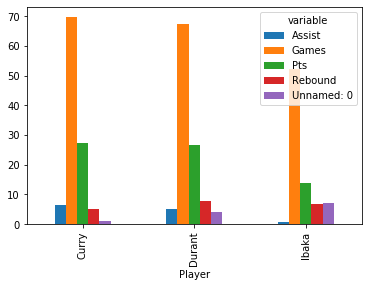

In [22]:
player_stats.unstack().plot.bar()

Now we can use the chart to make a number of statements about players:

- Ibaka does not get many assists, compared to Curry and Durant.  
- Steph and Kevin Durant are both high scorers.  


Based on the examples above, notice a few things about `unstack`:

- It is the *inverse* of `stack`; `stack` will move labels down
  from columns to index, while `unstack` moves them up from index to columns.  
- By default, `unstack` will move the level of the index closest to the data
  and place it in the column labels closest to the data.  

### pivot and pivot_table


#### pivot
The next two reshaping methods that we will use are closely related.

Some of you might even already be familiar with these ideas because you
have previously used *pivot tables* in Excel.

- If so, good news. We think this is even more powerful than Excel
  and easier to use!  
- If not, good news. You are about to learn a very powerful and user-friendly tool.  


We will begin with `pivot`.

The `pivot` method:

- Takes the unique values of one column and places them along the index.  
- Takes the unique values of another column and places them along the
  columns.  
- Takes the values that correspond to a third column and fills in the
  DataFrame values that correspond to that index/column pair.  


We’ll illustrate with an example.

In [23]:
# .head 8 excludes Ibaka -- will discuss why later
bball.head(6).pivot(index="Year", columns="Player", values="Pts")

Player,Curry,Durant
Year,,
2015,30.1,28.2
2016,25.3,25.1
2017,26.4,26.4


We can replicate `pivot` using three of the fundamental operations
from above:

1. Call `set_index` with the `index` and `columns` arguments  
1. Extract the `values` column  
1. `unstack` the columns level of the new index  

In [24]:
#  1---------------------------------------  2---  3----------------------
bball.head(6).set_index(["Year", "Player"])["Pts"].unstack(level="Player")

Player,Curry,Durant
Year,,
2015,30.1,28.2
2016,25.3,25.1
2017,26.4,26.4


One important thing to be aware of is that in order for `pivot` to
work, the index/column pairs must be *unique*!

Below, we demonstrate the error that occurs when they are not unique.

```python
# Ibaka shows up twice in 2016 because he was traded mid-season from
# the Orlando Magic to the Toronto Raptors
bball.pivot(index="Year", columns="Player", values="Pts")
```


#### pivot_table

The `pivot_table` method is a generalization of `pivot`.

It overcomes two limitations of `pivot`:

1. It allows you to choose multiple columns for the index/columns/values
  arguments.  
1. It allows you to deal with duplicate entries by
  having you choose how to combine them.  

In [25]:
bball

,Unnamed: 0,Year,Player,Team,TeamName,Games,Pts,Assist,Rebound
0,0,2015,Curry,GSW,Warriors,79,30.1,6.7,5.4
1,1,2016,Curry,GSW,Warriors,79,25.3,6.6,4.5
2,2,2017,Curry,GSW,Warriors,51,26.4,6.1,5.1
3,3,2015,Durant,OKC,Thunder,72,28.2,5.0,8.2
4,4,2016,Durant,GSW,Warriors,62,25.1,4.8,8.3
5,5,2017,Durant,GSW,Warriors,68,26.4,5.4,6.8
6,6,2015,Ibaka,OKC,Thunder,78,12.6,0.8,6.8
7,7,2016,Ibaka,ORL,Magic,56,15.1,1.1,6.8
8,8,2016,Ibaka,TOR,Raptors,23,14.2,0.7,6.8


Notice that we can replicate the functionality of `pivot` if we pass
the same arguments.

In [26]:
bball.head(6).pivot(index="Year", columns="Player", values="Pts")

Player,Curry,Durant
Year,,
2015,30.1,28.2
2016,25.3,25.1
2017,26.4,26.4


But we can also choose multiple columns to be used in
index/columns/values.

In [27]:
bball.pivot_table(index=["Year", "Team"], columns="Player", values="Pts")

Player     Curry  Durant  Ibaka
Year Team                      
2015 GSW    30.1     NaN    NaN
     OKC     NaN    28.2   12.6
2016 GSW    25.3    25.1    NaN
     ORL     NaN     NaN   15.1
     TOR     NaN     NaN   14.2
2017 GSW    26.4    26.4    NaN

In [28]:
bball.pivot_table(index="Year", columns=["Player", "Team"], values="Pts")

Player Curry Durant       Ibaka            
Team     GSW    GSW   OKC   OKC   ORL   TOR
Year                                       
2015    30.1    NaN  28.2  12.6   NaN   NaN
2016    25.3   25.1   NaN   NaN  15.1  14.2
2017    26.4   26.4   NaN   NaN   NaN   NaN

AND we can deal with duplicated index/column pairs.

In [29]:
# This produced an error
# bball.pivot(index="Year", columns="Player", values="Pts")

# This doesn't!
bball_pivoted = bball.pivot_table(index="Year", columns="Player", values="Pts")
bball_pivoted

Player,Curry,Durant,Ibaka
Year,,,
2015,30.1,28.2,12.60
2016,25.3,25.1,14.65
2017,26.4,26.4,NaN


`pivot_table` handles duplicate index/column pairs using an aggregation.

By default, the aggregation is the mean.

For example, our duplicated index/column pair is `("x", 1)` and had
associated values of 2 and 5.

Notice that `bball_pivoted.loc[2016, "Ibaka"]` is `(15.1 + 14.2)/2 = 14.65`.

We can choose how `pandas` aggregates all of the values.

For example, here’s how we would keep the max.

In [30]:
bball.pivot_table(index="Year", columns="Player", values="Pts", aggfunc=max)

Player,Curry,Durant,Ibaka
Year,,,
2015,30.1,28.2,12.6
2016,25.3,25.1,15.1
2017,26.4,26.4,NaN


Maybe we wanted to count how many values there were.

In [31]:
bball.pivot_table(index="Year", columns="Player", values="Pts", aggfunc=len)

Player,Curry,Durant,Ibaka
Year,,,
2015,1.0,1.0,1.0
2016,1.0,1.0,2.0
2017,1.0,1.0,NaN


We can even pass multiple aggregation functions!

In [32]:
bball.pivot_table(index="Year", columns="Player", values="Pts", aggfunc=[max, len])

max                len             
Player Curry Durant Ibaka Curry Durant Ibaka
Year                                        
2015    30.1   28.2  12.6   1.0    1.0   1.0
2016    25.3   25.1  15.1   1.0    1.0   2.0
2017    26.4   26.4   NaN   1.0    1.0   NaN

## Merge, join, and concatenate
**pandas** provides various facilities for easily combining together 
- Series
- DataFrame 
- Panel objects 

with 
- various kinds of set logic for the indexes 
- relational algebra functionality in the case of join / merge-type operations.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

###  Concatenating objects
Before diving into all of the details of concat and what it can do, here is a simple example:

```python
pd.concat(objs, axis=0, join='outer', join_axes= None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
```

From the **pd.concat** function, there are several important points 
- objs: it can be a **list** or **dict** of **Series** or **DataFrame**. **You should store all these objects into a list or dict and place at the first position** 
- axis: the axis to concatenate along. 
    - default 0, indicating the **row (index) of the DatafFrame**. 
    - 1 indicating **columns**. 
- join: how to handle indexes on other axis(es). {‘inner’, ‘outer’}, 
    - default ‘outer’.  Outer for union.
    - 'inner', inner for intersection.
- keys: sequence, default None. 
    - Construct hierarchical index using the passed keys as the outermost level. 
    - If multiple levels passed, should contain tuples.

In [6]:
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
    Concatenate pandas objects along a particular axis with optional set logic
    along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series, DataFrame, or Panel objects
        If a dict is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they are all None in which case a ValueError will be raised
    axis : {0/'index', 1/'columns'}, default 0
        The axis to concatenate along
    join : {'in

In [7]:
# Define the following DataFrames for illustration
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [8]:
print(df1)
print(df2)
print(df3)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7
      A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


**axis = 0**

![concat_axis0.gif](concat_axis0.gif)  

In [9]:
frames = [df1, df2, df3]
tmp = pd.concat(frames)
tmp

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [7]:
result = pd.concat(frames, keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [8]:
result.index

MultiIndex(levels=[['x', 'y', 'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [9]:
result.loc['x'].iloc[0]

A    A0
B    B0
C    C0
D    D0
Name: 0, dtype: object

In [10]:
print(result.loc['x'].loc[0])
print(result.loc[('x',0)])
print(result.loc['x',0])

A    A0
B    B0
C    C0
D    D0
Name: 0, dtype: object
A    A0
B    B0
C    C0
D    D0
Name: (x, 0), dtype: object
A    A0
B    B0
C    C0
D    D0
Name: (x, 0), dtype: object


It is worth mentioned again, in practice, you can use:
```None
frames = [ process_your_file(f) for f in files ]
result = pd.concat(frames)
```

**axis = 1**

![concat_axis1.gif](concat_axis1.gif)

In [11]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [12]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [13]:
pd.concat(frames,axis = 1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


#### Set logic on the other axes

In [14]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

In [15]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [16]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [17]:
result = pd.concat([df1, df4], axis=0)
# The same as result = pd.concat([df1, df4], axis=0, join = "outer")
result

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [18]:
result = pd.concat([df1, df4], axis=1)
# The same as result = pd.concat([df1, df4], axis=1, join = "outer")
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [19]:
result = pd.concat([df1, df4], axis=0,join = "inner")
result

,B,D
0,B0,D0
1,B1,D1
2,B2,D2
3,B3,D3
2,B2,D2
3,B3,D3
6,B6,D6
7,B7,D7


Lastly, suppose we just wanted to reuse the exact index from the original DataFrame:



In [20]:
df4['B']

2    B2
3    B3
6    B6
7    B7
Name: B, dtype: object

In [21]:
result = pd.concat([df1, df4], axis=1,
                   join_axes = [df4.index],
                   join = 'inner') 
# You can try to add option: join = "inner", the result is the same
# You can also try: result = pd.concat([df1, df4], axis=1, join_axes=[df4.index]) 
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


where,

- join_axes : list of Index objects. Specific indexes to use for the other n - 1 axes instead of performing inner/outer set logic.

#### Concatenating using *df.append()*
A useful shortcut to concat() are the append() instance methods on Series and DataFrame. These methods actually predated concat. They concatenate along axis=0, namely the index:

In [22]:
result = df1.append(df2)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


#### Ignoring indexes on the concatenation axis
For DataFrame s which don’t have a meaningful index, you may wish to **append them** and **ignore the fact that they may have overlapping indexes**. To do this, use the ignore_index argument:

In [23]:
result = pd.concat([df1, df4])
result

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [24]:
result0 = pd.concat([df1, df4], ignore_index=True)
result0

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [25]:
result = pd.concat([df1, df4], ignore_index=True, sort = True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [26]:
result0 == result

,A,B,C,D,F
0,True,True,True,True,False
1,True,True,True,True,False
2,True,True,True,True,False
3,True,True,True,True,False
4,False,True,False,True,True
5,False,True,False,True,True
6,False,True,False,True,True
7,False,True,False,True,True


In [27]:
result = pd.concat([df1, df4], ignore_index=False, sort = True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [28]:
result = pd.concat([df1, df4], axis = 1, ignore_index = True, sort = True)
result

,0,1,2,3,4,5,6
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [29]:
result = pd.concat([df1, df4], axis = 1, ignore_index = False, sort = True)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


#### Concatenating with mixed ndims
You can concatenate a mix of **Series** and **DataFrame**. 

**The Series will be transformed to DataFrame with the column name as the name of the Series.**

In [30]:
s1 = pd.Series(['X0', 'X1', 'X2', 'X3'], name='X')
result = pd.concat([df1, s1], axis=1)
result

,A,B,C,D,X
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


If unnamed Series are passed they will be numbered consecutively.

In [31]:
s2 = pd.Series(['_0', '_1', '_2', '_3'])
result = pd.concat([df1, s2, s2, s2], axis=1)
result

,A,B,C,D,0,1,2
0,A0,B0,C0,D0,_0,_0,_0
1,A1,B1,C1,D1,_1,_1,_1
2,A2,B2,C2,D2,_2,_2,_2
3,A3,B3,C3,D3,_3,_3,_3


#### Appending rows to a DataFrame
While not especially efficient (since a new object must be created), you can append a single row to a DataFrame by passing a Series or dict to append, which returns a new DataFrame as above.

In [32]:
s2 = pd.Series(['X0', 'X1', 'X2', 'X3'], index=['A', 'B', 'C', 'E'])
result = df1.append(s2, ignore_index = True) # ignore_index = True is required
result

,A,B,C,D,E
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,X0,X1,X2,NaN,X3


In [33]:
s2.name = 'XX'

In [34]:
s2

A    X0
B    X1
C    X2
E    X3
Name: XX, dtype: object

In [35]:
df1.loc[s2.name] = s2

In [36]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
XX,X0,X1,X2,NaN


In [37]:
df1.append(s2)

,A,B,C,D,E
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
XX,X0,X1,X2,NaN,NaN
XX,X0,X1,X2,NaN,X3


You should use ignore_index with this method to instruct DataFrame to discard its index. If you wish to preserve the index, you should construct an appropriately-indexed DataFrame and append or concatenate those objects.

The following is the same as the **df.append()** mentioned above.

In [38]:
result.loc[4] = s2
result

,A,B,C,D,E
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,X0,X1,X2,NaN,X3


### 13.1.2 Database-style DataFrame joining/merging

pandas provides a single function, **merge()**, as the entry point for all standard database join operations between DataFrame objects:

```python
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
```

- left: A DataFrame object.

- right: Another DataFrame object.

- on: **Column or index level names** to join on. 
    - Must be **found** in **both the left and right DataFrame objects**. 
    - If not passed and left_index and right_index are False, the intersection of the columns in the DataFrames will be inferred to be the join keys.

- left_on: **Columns or index levels from the left DataFrame** to use as keys. Can either be 
    - column names,
    - index level names, 
    - or arrays with length equal to the length of the DataFrame.

- right_on: **Columns or index levels from the right DataFrame to use as keys.** 
    - Data types are the same as left_on

- left_index: 
    - If True, use the index (row labels) from the left DataFrame as its join key(s). 
    - In the case of a DataFrame with a MultiIndex (hierarchical), the number of levels must match the number of join keys from the right DataFrame.

- right_index: Same usage as left_index for the right DataFrame

- how: One of 'left', 'right', 'outer', 'inner'.  Defaults to inner.

- sort: Sort the result DataFrame by the **join keys** in **lexicographical order**. Defaults to True, setting to False will improve performance substantially in many cases.

![right_merge.gif](right_merge.gif)  

**The return type is the same as the left.**

#### Brief primer on merge methods (relational algebra)
The terminology used to describe join operations between two SQL-table like structures (DataFrame objects) is based on SQL-logic. 

There are several cases to consider which are very important to understand:
- one-to-one joins: for example when joining two DataFrame objects on their indexes (which must contain unique values).
- many-to-one joins: for example when joining an index (unique) to one or more columns in a different DataFrame.
- many-to-many joins: joining columns on columns.

In [39]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
result = pd.merge(left, right, on='key')
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [40]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [41]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [42]:
result = pd.merge(left, right, on='key')
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


Q1:将debtpaying.csv和Dataset01.csv根据股票代码和股票名字进行合并

Q2: 运用合并方法，结合hs300dataset，debtpaying和cashflow提取沪深300各成分股的现金流和debtpaying数据，组成一个新的DataFrame.

Here is a more complicated example with multiple join keys. Only the keys appearing in left and right are present (the intersection), since how='inner' by default.

In [ ]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
print(left)
print('\n')
print(right)
pd.merge(left, right, on=['key1', 'key2'])

Q3: 将hs300dataset里面的ST股票的各项指标提取出来并合并，与其他股票分开存在两个不同的DataFarme，并做简单比较。

Q4: 将hs300dataset里面的属于沪深300指数成分的股票的各项指标提取出来并合并，与其他股票分开存在两个不同的DataFarme，并做简单比较。

The **how** argument to merge specifies 
- how to determine which keys are to be included in the resulting table. 
- If a key combination **does not appear** in either the left or right tables, the values in the joined table will be NA. 

Here is a summary of the how options and their SQL equivalent names:


|Merge method |	SQL Join Name	|Description|
|-------------|-----------------|----------------------------------------|
|left	      |LEFT OUTER JOIN	|Use keys from left frame only|
|right	      |RIGHT OUTER JOIN	|Use keys from right frame only|
|outer	      |FULL OUTER JOIN	|Use union of keys from both frames|
|inner	      |INNER JOIN	    |Use intersection of keys from both frames|

![merge_venns.png](merge_venns.png) 

In [ ]:
result = pd.merge(left, right, how='left', on=['key1', 'key2'])
print(left)
print('\n')
print(right)

result

In [ ]:
result = pd.merge(left, right, how='right', on=['key1', 'key2'])
print(left)
print('\n')
print(right)

result

In [ ]:
result = pd.merge(left, right, how='outer', on=['key1', 'key2'])
print(left)
print('\n')
print(right)

result

Here is another example with duplicate join keys in DataFrames:

In [ ]:
left = pd.DataFrame({'A' : [1,2], 'B' : [2, 2]})

right = pd.DataFrame({'A' : [4,5,6], 'B': [2,2,2]})

result = pd.merge(left, right, on='B', 
                  how='outer',
                  suffixes=('_left', '_right'))
result

#### Checking for duplicate keys

Users can use the validate argument to 
- **automatically check whether there are unexpected duplicates in their merge keys**. 
- Key uniqueness is **checked before** merge operations and so should protect against memory overflows. 
- **Checking key uniqueness** is also a good way to **ensure user data structures are as expected**.

In the following example, there are duplicate values of B in the right DataFrame. As this is not a one-to-one merge – as specified in the validate argument – an exception will be raised.

In [ ]:
left = pd.DataFrame({'A' : [1,2], 'B' : [1, 2]})
print(left)
print('\n')
right = pd.DataFrame({'A' : [4,5,6], 'B': [2, 2, 2]})
print(right)

In [ ]:
#The following command would be wrong, since there exists duplicate keys.
result = pd.merge(left, right, on='B', how='outer', validate="one_to_one")

In [ ]:
result = pd.merge(left, right, on='B', how='outer',
                  validate="many_to_one")

In [ ]:
result = pd.merge(left, right, on='B', 
                  how='outer', validate="many_to_many")
result

If the user is 
- aware of the duplicates in the right DataFrame 
- but wants to ensure there are no duplicates in the left DataFrame, one can use the **validate='one_to_many'** argument instead, which will not raise an exception.

In [ ]:
pd.merge(left, right, on='B', how='outer', validate="one_to_many")

#### The merge indicator (which part does the key comes from)
**merge()** accepts the argument indicator. 
- If True, a Categorical-type column called _merge will be added to the output object that takes on values:

|Observation Origin	|_merge value|
|-------------------|-----|
|Merge key only in 'left' frame	|left_only|
|Merge key only in 'right' frame |	right_only|
|Merge key in both frames	|both|

In [ ]:
df1 = pd.DataFrame({'col1': [0, 1], 'col_left':['a', 'b']})
print(df1)
print('\n')
df2 = pd.DataFrame({'col1': [1, 2, 2],'col_right':[2, 2, 2]})
print(df2)
pd.merge(df1, df2, on='col1', how='outer', indicator=True)

The indicator argument will also accept string arguments, in which case the indicator function will use the value of the passed string as the name for the indicator column.

In [ ]:
pd.merge(df1, df2, on='col1', how='outer', indicator='indicator_column')

#### merge on the index

One may be interested in merging two DataFrames based on the index. 

In [ ]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                    index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])
print(left)
print(right)

In [ ]:
result = pd.merge(left, right, left_index=True, right_index=True, how='outer')
result

In [ ]:
result = pd.merge(left, right, left_index=True, right_index=True, how='inner');
result

In [ ]:
right02 = right.reset_index()
right02

In [ ]:
left

In [ ]:
result = pd.merge(left, right02, left_index=True, 
                  right_on=['index'], 
                  how='inner');
result

In [ ]:
result = pd.merge(left, right, left_on=['B'], 
                  right_on=['C'], 
                  how='outer');
result

### Joining on index
**df.join()** is a convenient method for 
- **combining the columns** of **two** potentially differently-indexed **DataFrames** into a **single** result DataFrame. 

Here is a very basic example:

In [ ]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                    index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])
print(left)
print(right)

In [ ]:
result = left.join(right)
result

You would realize that it is the same as the command below

In [ ]:
pd.concat([left,right],axis = 1, join_axes = [left.index])

In [ ]:
result = left.join(right, how='outer')
result

In [ ]:
pd.concat([left,right],axis = 1, sort = False)

The same as above, but with how='inner'.

In [ ]:
result = left.join(right, how='inner')
result

In [ ]:
pd.concat([left,right],axis = 1, join = 'inner')

Further, one can realize that 
- the data alignment here is on the indexes (row labels). 
- This same behavior can be achieved using **pd.merge()** plus additional arguments instructing it to use the indexes:

In [ ]:
result = pd.merge(left, right, left_index=True, right_index=True, how='outer')
result

In [ ]:
result = pd.merge(left, right, left_index=True, right_index=True, how='inner')
result

#### Joining key columns on an index
Prevous examples illustrate how to **join** two DataFrames on all the indexes.

In practice, we may only need several columns. We can use the following command
```
left.join(right, on=key_or_keys)
```
which is equivalent to 
```
pd.merge(left, right, left_on=key_or_keys, right_index=True,
      how='left', sort=False)
```
You can use either of them.

In [ ]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                     'key': ['K0', 'K1', 'K0', 'K1']})
right = pd.DataFrame({'C': ['C0', 'C1'],
                      'D': ['D0', 'D1']},
                     index=['K0', 'K1'])
print(left)
print(right)
result = left.join(right, on='key')
result

The result is the same as follows.

In [ ]:
result = pd.merge(left, right, left_on='key', right_index=True,
                  how='left', sort=False)
result

## Groupby

By “group by” we are referring to a process involving one or more of the following steps:
- **Splitting** the data into groups based on some criteria.
- **Applying** a function to each group independently.
- **Combining** the results into a data structure.

Out of these, the split step is the most straightforward. In fact, in many situations we may wish to split the data set into groups and do something with those groups. 

**pandas** objects can be split on any of their axes. The abstract definition of grouping is to provide a mapping of labels to group names. To create a GroupBy object (more on what the GroupBy object is later), you may do the following:


default is axis=0
> grouped = obj.groupby(key)

> grouped = obj.groupby(key, axis=1) # Group by splitting the columns

> grouped = obj.groupby([key1, key2])

In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.326755,-0.632310
1,bar,one,0.262746,-1.222021
2,foo,two,-0.716752,-0.478605
3,bar,three,-1.775179,0.869301
4,foo,two,0.688602,-0.205036
5,bar,two,0.556504,0.006794
6,foo,one,0.954964,0.103944
7,foo,three,-1.549486,-0.438344


In [7]:
grouped = df.groupby('A')

In [8]:
grouped.count()

,B,C,D
A,,,
bar,3,3,3
foo,5,5,5


If a **non-unique index** is used as the group key in a groupby operation, 
- all values for **the same index value** will be considered to be in **one group**
- the output of aggregation functions will **only contain unique index values**:

We can see the details in this **grouped object**.

In [9]:
for name, group in grouped:
    print(name)
    print(group)

bar
     A      B         C         D
1  bar    one  0.262746 -1.222021
3  bar  three -1.775179  0.869301
5  bar    two  0.556504  0.006794
foo
     A      B         C         D
0  foo    one  0.326755 -0.632310
2  foo    two -0.716752 -0.478605
4  foo    two  0.688602 -0.205036
6  foo    one  0.954964  0.103944
7  foo  three -1.549486 -0.438344


In [10]:
# We can see the group elements and the associated index
grouped.groups

{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

we can extract the names from the group object.

In [11]:
name = []
for name_iter in grouped.groups.keys():
    name.append(name_iter)

In [12]:
name

['bar', 'foo']

In [13]:
grouped.groups.keys()

dict_keys(['bar', 'foo'])

According to the names, we can **get the associated group given the name**.

In [14]:
grouped.get_group('foo')

,A,B,C,D
0,foo,one,0.326755,-0.632310
2,foo,two,-0.716752,-0.478605
4,foo,two,0.688602,-0.205036
6,foo,one,0.954964,0.103944
7,foo,three,-1.549486,-0.438344


In [15]:
grouped.get_group(name[0])
# The second group: grouped.get_group(name[1])

,A,B,C,D
1,bar,one,0.262746,-1.222021
3,bar,three,-1.775179,0.869301
5,bar,two,0.556504,0.006794


We can also use **list** to view the details in the grouped object. Once you can obtain the **list**, you can also transform it into other data structures.

In [16]:
list(grouped)[1]

('foo',
      A      B         C         D
 0  foo    one  0.326755 -0.632310
 2  foo    two -0.716752 -0.478605
 4  foo    two  0.688602 -0.205036
 6  foo    one  0.954964  0.103944
 7  foo  three -1.549486 -0.438344)

The associated calculation in the **grouped object** is done in **each group**.

In [17]:
grouped.mean()

,C,D
A,,
bar,-0.318643,-0.115309
foo,-0.059183,-0.330070


In [18]:
grouped.sum()

,C,D
A,,
bar,-0.955929,-0.345927
foo,-0.295917,-1.650350


In [19]:
grouped.var()

,C,D
A,,
bar,1.612695,1.104589
foo,1.097506,0.082284


In [20]:
grouped.corr()

C         D
A                        
bar C  1.000000 -0.738265
    D -0.738265  1.000000
foo C  1.000000  0.562407
    D  0.562407  1.000000

NameError: name 'plt' is not defined

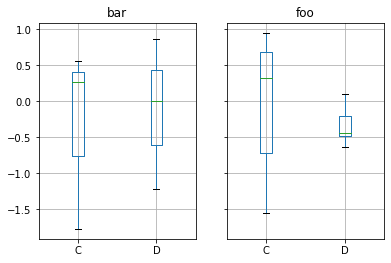

In [21]:
grouped.boxplot()
plt.show()

A    B    
bar  one      AxesSubplot(0.125,0.125;0.775x0.755)
     three    AxesSubplot(0.125,0.125;0.775x0.755)
     two      AxesSubplot(0.125,0.125;0.775x0.755)
foo  one      AxesSubplot(0.125,0.125;0.775x0.755)
     three    AxesSubplot(0.125,0.125;0.775x0.755)
     two      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

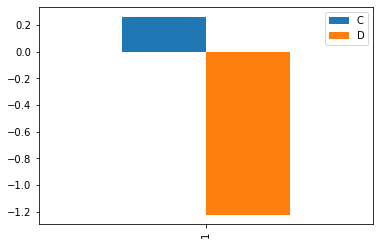

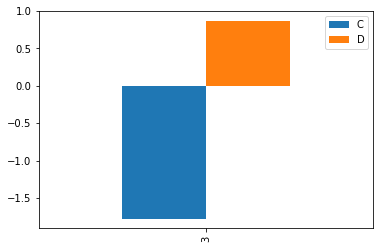

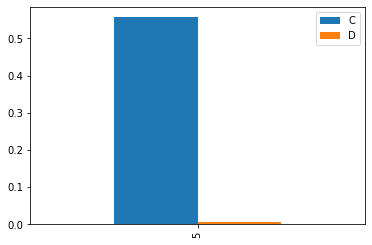

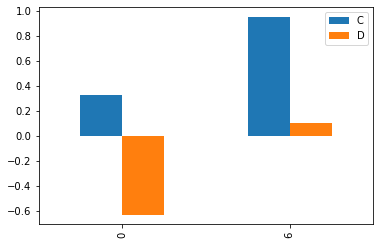

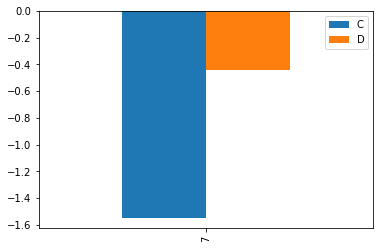

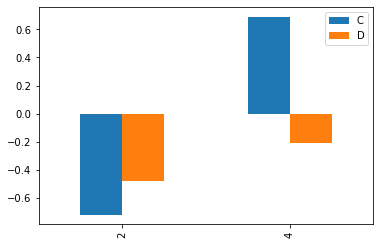

In [23]:
grouped.plot(kind = "bar")

Sometimes we can also group the data according to more than one keys.

In [24]:
grouped = df.groupby(['A','B'])

In [25]:
grouped.count()

C  D
A   B          
bar one    1  1
    three  1  1
    two    1  1
foo one    2  2
    three  1  1
    two    2  2

In [26]:
grouped.mean()

C         D
A   B                        
bar one    0.262746 -1.222021
    three -1.775179  0.869301
    two    0.556504  0.006794
foo one    0.640859 -0.264183
    three -1.549486 -0.438344
    two   -0.014075 -0.341820

#### GroupBy sorting
By default the group keys are sorted during the groupby operation. You may however pass **sort=False** for potential speedups:

In [27]:
df2 = pd.DataFrame({'X' : ['B', 'B', 'A', 'A'], 'Y' : [1, 2, 3, 4]})
df2.groupby(['X']).sum()

,Y
X,
A,7
B,3


In [28]:
df2.groupby(['X'], sort=False).sum()

,Y
X,
B,3
A,7


1. 读取本地文件Dataset01.csv,

    - Q1: 求各个地区各个行业的各项财务指标的均值和中位数，并去掉‘code’对应的那一列。

    - Q2: 从其中提取上海和江苏两地的数据，分别放在新的DataFrame，进行比较。


2. 读取2010到2017年epcf数据

Q: 请提取从2010年到2017年上市公司的第四季度业绩报表数据，将其中epcf（每股现金流量(元)）都提取出来。计算每家公司epcf的年度增长率。

3. 根据第二题的数据，提取roe（净资产收益率(%)）数据，根据按照收益率的25%，75%分位数每年分三组，比较每年各组股票成分的变动？